In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/clean/clean_housing_tunisia.csv")
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7340 entries, 0 to 7339
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          7340 non-null   float64
 1   surface        7340 non-null   float64
 2   rooms          7340 non-null   int64  
 3   governorate    7340 non-null   object 
 4   property_type  7340 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 286.8+ KB


,price,surface,rooms
count,7.340000e+03,7.340000e+03,7.340000e+03
mean,4.332466e+06,1.339924e+04,2.051215e+02
std,1.405801e+08,1.119430e+06,1.366865e+04
min,1.200000e+00,-1.020000e+02,-3.000000e+00
25%,2.499728e+05,1.040000e+02,2.000000e+00
50%,4.150000e+05,1.550000e+02,3.000000e+00
75%,7.800000e+05,3.000000e+02,4.000000e+00
max,1.111111e+10,9.590518e+07,1.111111e+06


### Description of the target (price)

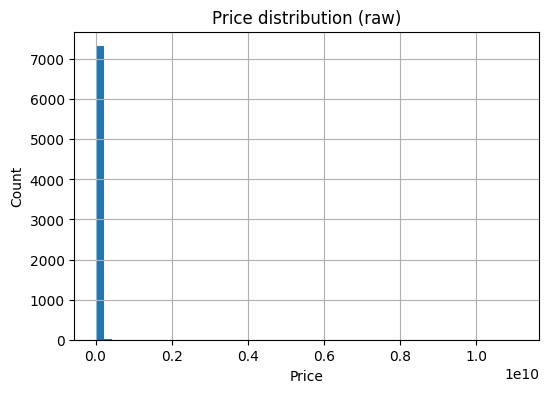

In [8]:
plt.figure(figsize=(6,4))
df["price"].hist(bins=50)
plt.title("Price distribution (raw)")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


### Log transform price

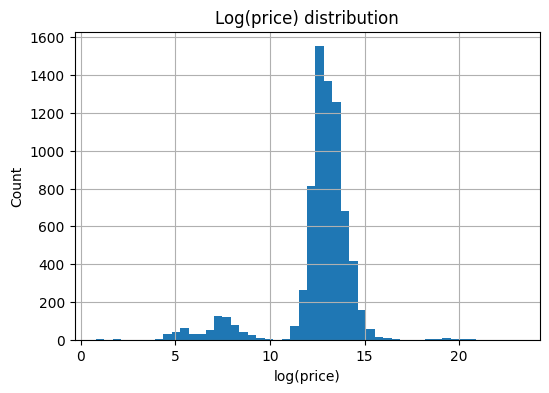

In [9]:
df["log_price"] = np.log1p(df["price"])

plt.figure(figsize=(6,4))
df["log_price"].hist(bins=50)
plt.title("Log(price) distribution")
plt.xlabel("log(price)")
plt.ylabel("Count")
plt.show()


### Surface and room inspection

#### Surface

In [12]:
df["surface"].describe(percentiles=[0.5, 0.9, 0.95, 0.99])


count    7.340000e+03
mean     1.339924e+04
std      1.119430e+06
min     -1.020000e+02
50%      1.550000e+02
90%      5.052000e+02
95%      6.700000e+02
99%      1.264150e+03
max      9.590518e+07
Name: surface, dtype: float64

/home/amalsboui/Projects/Project2/House_Price_Prediction/venv/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


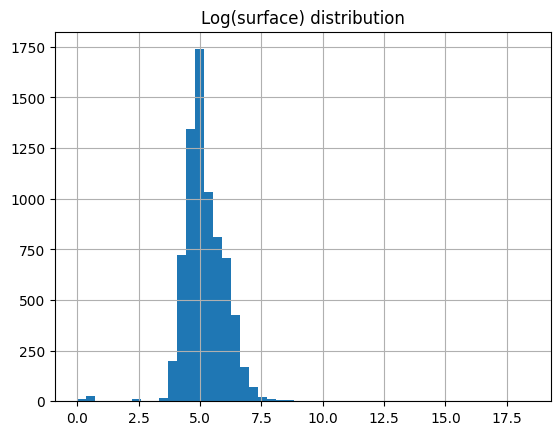

In [13]:
df["log_surface"] = np.log1p(df["surface"])

df["log_surface"].hist(bins=50)
plt.title("Log(surface) distribution")
plt.show()

#### Rooms

In [14]:
df["rooms"].value_counts().sort_index()


rooms
-3             1
-2             2
-1             8
 0            42
 1           735
 2          1898
 3          2176
 4          1225
 5           634
 6           260
 7           122
 8            84
 9            58
 10           25
 11           12
 12           20
 13            7
 14            6
 15            2
 16            6
 17            1
 19            1
 20            4
 24            2
 25            1
 28            1
 38            1
 70            1
 100           1
 111           1
 300           1
 370000        1
 1111111       1
Name: count, dtype: int64

### Categorical Variables

#### Governorate

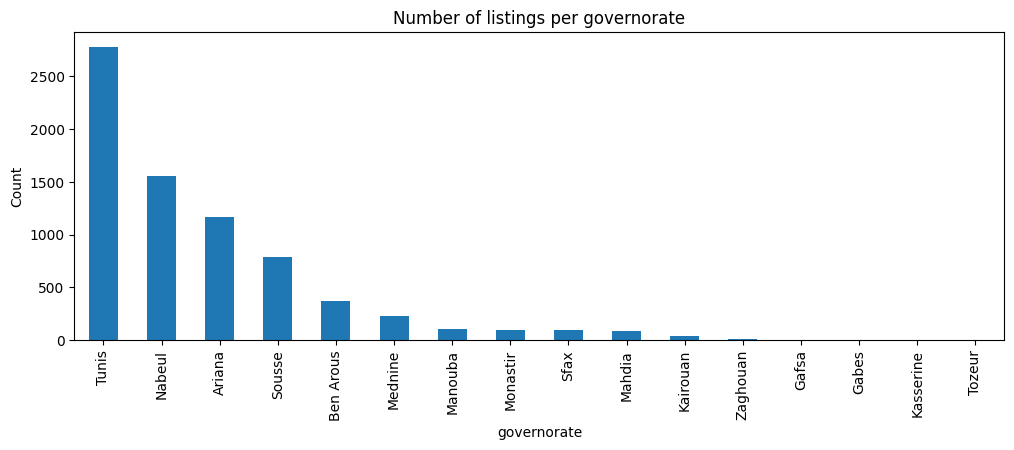

In [15]:
plt.figure(figsize=(12,4))
df["governorate"].value_counts().plot(kind="bar")
plt.title("Number of listings per governorate")
plt.ylabel("Count")
plt.show()

#### Property type

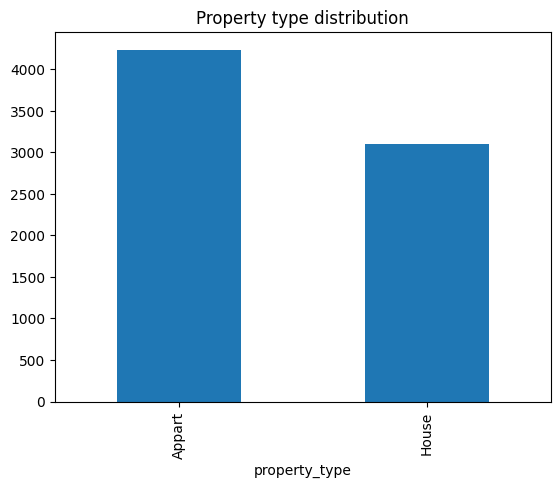

In [16]:
df["property_type"].value_counts().plot(kind="bar")
plt.title("Property type distribution")
plt.show()


### Relationships

#### Price vs Surface (raw)

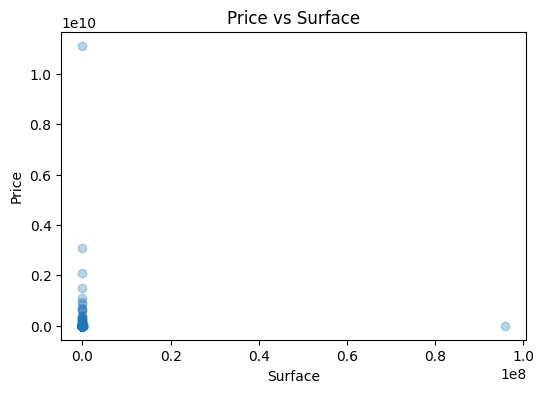

In [17]:
plt.figure(figsize=(6,4))
plt.scatter(df["surface"], df["price"], alpha=0.3)
plt.xlabel("Surface")
plt.ylabel("Price")
plt.title("Price vs Surface")
plt.show()


#### Log to log relationship

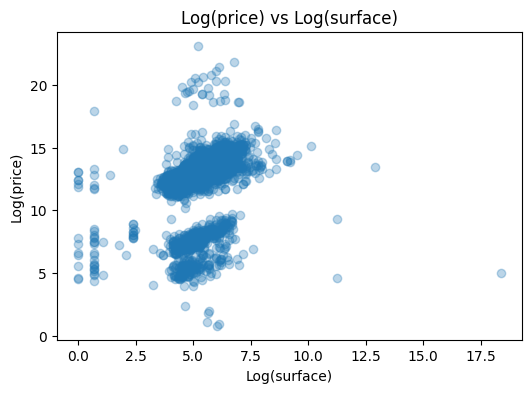

In [18]:
plt.figure(figsize=(6,4))
plt.scatter(df["log_surface"], df["log_price"], alpha=0.3)
plt.xlabel("Log(surface)")
plt.ylabel("Log(price)")
plt.title("Log(price) vs Log(surface)")
plt.show()


#### Price by government

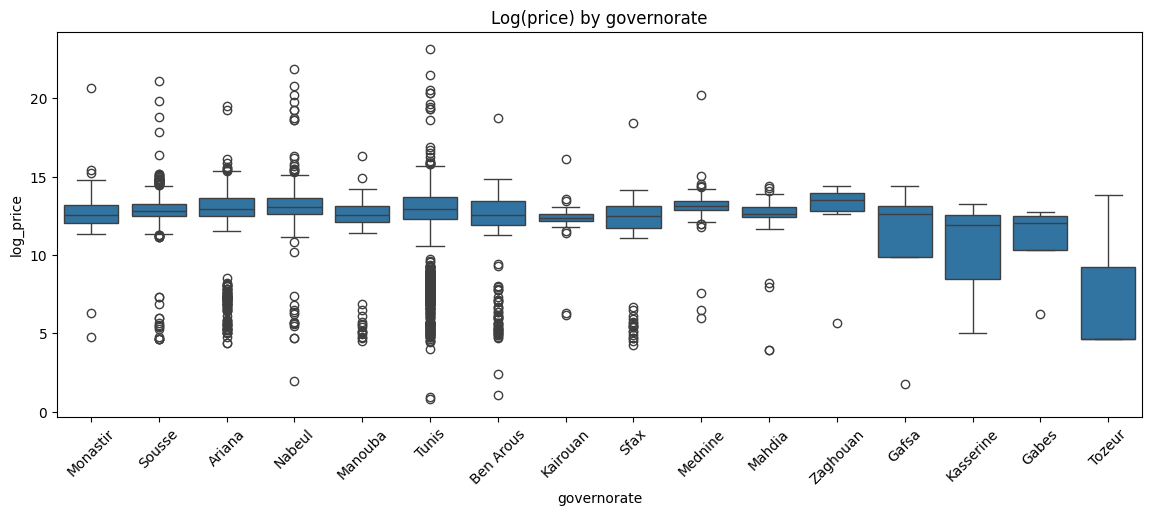

In [19]:
plt.figure(figsize=(14,5))
sns.boxplot(x="governorate", y="log_price", data=df)
plt.xticks(rotation=45)
plt.title("Log(price) by governorate")
plt.show()


# Cleaning unreasonable/impossible data

In [29]:
df = df[(df["price"] > 10000) & (df["price"] < 1e7)]



In [31]:
df = df[(df["surface"] > 10) & (df["surface"] < 5000)]


In [32]:
df = df[(df["rooms"] >= 1) & (df["rooms"] <= 10)]


In [33]:
df["log_price"] = np.log1p(df["price"])
df["log_surface"] = np.log1p(df["surface"])


In [34]:
df[["price", "surface"]].describe(percentiles=[0.95, 0.99])


,price,surface
count,6.530000e+03,6530.000000
mean,6.793918e+05,242.932496
std,6.937952e+05,258.746536
min,1.111100e+04,27.000000
50%,4.500000e+05,155.000000
95%,1.900000e+06,650.000000
99%,3.500000e+06,1200.000000
max,9.000000e+06,4650.000000


In [35]:
df.to_csv("data/clean/clean_housing_tunisia_model_ready.csv", index=False)
